# Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from prophet import Prophet
warnings.filterwarnings('ignore')

# EDA

In [ ]:
df1 = pd.read_csv('Data set 1.csv')
df1.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Year,Month,Day
0,2014/3/1,382,100,282,172,210,1,3,9,8,...,6.8,12.1,81,3.1,0,0,9.3,2014,3,1
1,2014/3/2,174,52,122,98,76,0,1,2,5,...,4.7,7.7,93,4.1,13.5,0,8.5,2014,3,2
2,2014/3/3,436,114,322,229,207,0,0,14,12,...,4.0,10.0,64,4.7,0,3.6,5.9,2014,3,3
3,2014/3/4,353,77,276,179,174,1,4,12,12,...,2.9,11.0,53,2.6,0.5,8.7,5.3,2014,3,4
4,2014/3/5,248,54,194,126,122,1,0,8,7,...,4.3,8.8,91,4.5,45,0,8.5,2014,3,5


In [ ]:
df1.shape

(4079, 37)

In [ ]:
df1.isnull().sum()

,0
Date,0
Total,0
Influneza A,0
Influneza B,0
Male,0
Female,0
0–5 months,0
6–11 months,0
1 year,0
2 years,0


In [ ]:
df_2015_2019 = df[(df['Year'] >= 2015) & (df['Year'] <= 2019)]
df_2015_2019.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Year,Month,Day
306,2015/1/1,313,310,3,147,166,2,1,3,5,...,0.6,9.0,47,4.6,0,0.2,3.8,2015,1,1
307,2015/1/2,311,307,4,156,155,2,1,7,5,...,-0.8,7.7,46,2.2,NaN,6,3.5,2015,1,2
308,2015/1/3,298,294,4,134,164,0,0,6,7,...,0.3,8.5,45,2.3,NaN,9.6,3.7,2015,1,3
309,2015/1/4,302,299,3,144,158,1,2,3,6,...,1.0,9.5,56,1.7,NaN,6.7,4.9,2015,1,4
310,2015/1/5,713,710,3,352,361,3,3,33,16,...,2.7,13.3,57,2.6,NaN,9.3,5.9,2015,1,5


In [ ]:
df_2015_2019.tail()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Year,Month,Day
2127,2019/12/27,357,357,0,175,182,0,2,8,13,...,5.7,15.2,64,5.1,0,6.3,7.5,2019,12,27
2128,2019/12/28,291,291,0,147,144,1,4,5,5,...,4.6,11.2,43,5.6,NaN,8.6,4.3,2019,12,28
2129,2019/12/29,194,194,0,98,96,0,1,3,2,...,4.9,10.6,47,2.6,NaN,6.7,5.1,2019,12,29
2130,2019/12/30,270,270,0,134,136,0,5,2,2,...,6.2,14.5,70,2.9,0.5,0,7.7,2019,12,30
2131,2019/12/31,256,256,0,144,112,0,2,2,2,...,4.7,20.3,58,5.2,0,6.6,7.3,2019,12,31


In [ ]:
df_2015_2019.to_csv('df_2015_2019.csv', index=False)
print('Dataset df_2015_2019.csv downloaded successfully.')

Dataset df_2015_2019.csv downloaded successfully.


# Data 2015-2019

In [ ]:
df = pd.read_csv('data2015-19.csv')
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Year,Month,Day
0,2015/1/1,313,310,3,147,166,2,1,3,5,...,0.6,9.0,47,4.6,0.0,0.2,3.8,2015,1,1
1,2015/1/2,311,307,4,156,155,2,1,7,5,...,-0.8,7.7,46,2.2,NaN,6,3.5,2015,1,2
2,2015/1/3,298,294,4,134,164,0,0,6,7,...,0.3,8.5,45,2.3,NaN,9.6,3.7,2015,1,3
3,2015/1/4,302,299,3,144,158,1,2,3,6,...,1.0,9.5,56,1.7,NaN,6.7,4.9,2015,1,4
4,2015/1/5,713,710,3,352,361,3,3,33,16,...,2.7,13.3,57,2.6,NaN,9.3,5.9,2015,1,5


In [ ]:
df.tail()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Year,Month,Day
1821,2019/12/27,357,357,0,175,182,0,2,8,13,...,5.7,15.2,64,5.1,0.0,6.3,7.5,2019,12,27
1822,2019/12/28,291,291,0,147,144,1,4,5,5,...,4.6,11.2,43,5.6,NaN,8.6,4.3,2019,12,28
1823,2019/12/29,194,194,0,98,96,0,1,3,2,...,4.9,10.6,47,2.6,NaN,6.7,5.1,2019,12,29
1824,2019/12/30,270,270,0,134,136,0,5,2,2,...,6.2,14.5,70,2.9,0.5,0,7.7,2019,12,30
1825,2019/12/31,256,256,0,144,112,0,2,2,2,...,4.7,20.3,58,5.2,0.0,6.6,7.3,2019,12,31


In [ ]:
df.shape

(1826, 34)

In [ ]:
df.isnull().sum()

,0
Date,0
Total,0
Influneza A,0
Influneza B,0
Male,0
Female,0
0–5 months,0
6–11 months,0
1 year,0
2 years,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1826 non-null   object 
 1   Total                1826 non-null   int64  
 2   Influneza A          1826 non-null   int64  
 3   Influneza B          1826 non-null   int64  
 4   Male                 1826 non-null   int64  
 5   Female               1826 non-null   int64  
 6   0–5 months           1826 non-null   int64  
 7   6–11 months          1826 non-null   int64  
 8   1 year               1826 non-null   int64  
 9   2 years              1826 non-null   int64  
 10  3 years              1826 non-null   int64  
 11  4 years              1826 non-null   int64  
 12  5 years              1826 non-null   int64  
 13  6 years              1826 non-null   int64  
 14  7 years              1826 non-null   int64  
 15  8 years              1826 non-null   i

In [ ]:
if 'Sunshine duration' in df.columns and df['Sunshine duration'].dtype == 'object':
    df['Sunshine duration'] = pd.to_numeric(df['Sunshine duration'], errors='coerce')
    print("Tipe data 'Sunshine duration' telah diubah menjadi numerik.")
else:
    print("Kolom 'Sunshine duration' sudah numerik atau tidak ditemukan.")

print("Info DataFrame setelah perubahan:")
df.info()

Tipe data 'Sunshine duration' telah diubah menjadi numerik.
Info DataFrame setelah perubahan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1826 non-null   datetime64[ns]
 1   Total                1826 non-null   int64         
 2   Influneza A          1826 non-null   int64         
 3   Influneza B          1826 non-null   int64         
 4   Male                 1826 non-null   int64         
 5   Female               1826 non-null   int64         
 6   0–5 months           1826 non-null   int64         
 7   6–11 months          1826 non-null   int64         
 8   1 year               1826 non-null   int64         
 9   2 years              1826 non-null   int64         
 10  3 years              1826 non-null   int64         
 11  4 years              1826 non-null   int64         
 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
df = df.drop(columns=['Year', 'Month', 'Day'])
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,70–79 years,80 years and over,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2015/1/1,313,310,3,147,166,2,1,3,5,...,14,22,3.8,0.6,9.0,47,4.6,0.0,0.2,3.8
1,2015/1/2,311,307,4,156,155,2,1,7,5,...,17,17,3.2,-0.8,7.7,46,2.2,NaN,6,3.5
2,2015/1/3,298,294,4,134,164,0,0,6,7,...,11,12,4.5,0.3,8.5,45,2.3,NaN,9.6,3.7
3,2015/1/4,302,299,3,144,158,1,2,3,6,...,8,15,5.0,1.0,9.5,56,1.7,NaN,6.7,4.9
4,2015/1/5,713,710,3,352,361,3,3,33,16,...,27,16,7.8,2.7,13.3,57,2.6,NaN,9.3,5.9


In [ ]:
df = df.drop(columns=['0–5 months', '6–11 months', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10–14 years', '15–19 years', '20–29 years', '30–39 years', '40–49 years', '50–59 years', '60–69 years', '70–79 years', '80 years and over'])
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2015/1/1,313,310,3,147,166,3.8,0.6,9.0,47,4.6,0.0,0.2,3.8
1,2015/1/2,311,307,4,156,155,3.2,-0.8,7.7,46,2.2,NaN,6,3.5
2,2015/1/3,298,294,4,134,164,4.5,0.3,8.5,45,2.3,NaN,9.6,3.7
3,2015/1/4,302,299,3,144,158,5.0,1.0,9.5,56,1.7,NaN,6.7,4.9
4,2015/1/5,713,710,3,352,361,7.8,2.7,13.3,57,2.6,NaN,9.3,5.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1826 non-null   object 
 1   Total                1826 non-null   int64  
 2   Influneza A          1826 non-null   int64  
 3   Influneza B          1826 non-null   int64  
 4   Male                 1826 non-null   int64  
 5   Female               1826 non-null   int64  
 6   Temperature          1826 non-null   float64
 7   Minimum Temperature  1826 non-null   float64
 8   Maximum Temperature  1826 non-null   float64
 9   Relative humidity    1826 non-null   int64  
 10  Wind speed           1826 non-null   float64
 11  Rainfall             1036 non-null   float64
 12  Sunshine duration    1826 non-null   object 
 13  Vapour pressure      1826 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 199.8+ KB


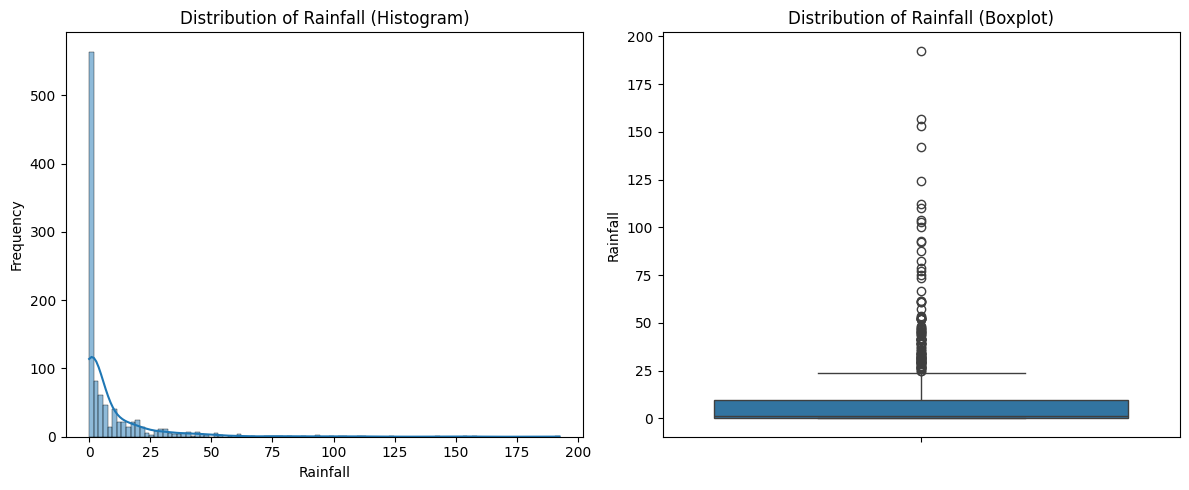

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['Rainfall'], kde=True)
plt.title('Distribution of Rainfall (Histogram)')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df['Rainfall'])
plt.title('Distribution of Rainfall (Boxplot)')
plt.ylabel('Rainfall')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,3 years,...,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Vapour pressure,Year,Month,Day
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,...,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1036.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,89.648412,65.614458,24.033954,46.119934,43.528478,0.173056,0.568456,2.077218,2.274918,2.618291,...,16.800274,13.642826,20.751205,68.463308,3.489321,8.633687,15.078861,2016.999452,6.523549,15.727820
std,192.997424,159.349225,77.438548,100.150245,93.145987,0.538549,1.393516,4.786288,5.289224,6.111429,...,7.578086,7.860737,7.728856,15.804873,1.199745,18.178031,8.564782,1.414407,3.449478,8.801735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.700000,-2.700000,3.600000,28.000000,1.300000,0.000000,2.200000,2015.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.600000,6.200000,13.900000,57.000000,2.600000,0.000000,7.225000,2016.000000,4.000000,8.000000
50%,8.000000,5.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.400000,14.300000,21.100000,71.000000,3.200000,1.000000,13.600000,2017.000000,7.000000,16.000000
75%,62.000000,37.750000,9.000000,31.750000,32.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,22.800000,20.300000,26.800000,80.000000,4.000000,9.625000,22.200000,2018.000000,10.000000,23.000000
max,1718.000000,1717.000000,981.000000,931.000000,787.000000,4.000000,12.000000,43.000000,55.000000,66.000000,...,31.600000,27.800000,37.400000,99.000000,9.000000,192.500000,33.600000,2019.000000,12.000000,31.000000


In [ ]:
median_rainfall = df['Rainfall'].median()
print("Median Rainfall:", median_rainfall)

Median Rainfall: 1.0


In [ ]:
mean = df['Rainfall'].mean()
print("mean Rainfall:", mean)

mean Rainfall: 8.633687258687258


In [ ]:
df['Rainfall'] = df['Rainfall'].interpolate(method='linear')

In [ ]:
df['Rainfall'] = df['Rainfall'].round(1)
print("Head DataFrame setelah pembulatan Rainfall:")
print(df.head())
print("\nTail DataFrame setelah pembulatan Rainfall:")
print(df.tail())

Head DataFrame setelah pembulatan Rainfall:
        Date  Total  Influneza A  Influneza B  Male  Female  0–5 months  \
0 2015-01-01    313          310            3   147     166           2   
1 2015-01-02    311          307            4   156     155           2   
2 2015-01-03    298          294            4   134     164           0   
3 2015-01-04    302          299            3   144     158           1   
4 2015-01-05    713          710            3   352     361           3   

   6–11 months  1 year  2 years  ...  70–79 years  80 years and over  \
0            1       3        5  ...           14                 22   
1            1       7        5  ...           17                 17   
2            0       6        7  ...           11                 12   
3            2       3        6  ...            8                 15   
4            3      33       16  ...           27                 16   

   Temperature  Minimum Temperature  Maximum Temperature  Relative humid

In [ ]:
df.isnull().sum()

,0
Date,0
Total,0
Influneza A,0
Influneza B,0
Male,0
Female,0
0–5 months,0
6–11 months,0
1 year,0
2 years,0


In [ ]:
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,70–79 years,80 years and over,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2015-01-01,313,310,3,147,166,2,1,3,5,...,14,22,3.8,0.6,9.0,47,4.6,0.0,0.2,3.8
1,2015-01-02,311,307,4,156,155,2,1,7,5,...,17,17,3.2,-0.8,7.7,46,2.2,3.3,6,3.5
2,2015-01-03,298,294,4,134,164,0,0,6,7,...,11,12,4.5,0.3,8.5,45,2.3,6.6,9.6,3.7
3,2015-01-04,302,299,3,144,158,1,2,3,6,...,8,15,5.0,1.0,9.5,56,1.7,9.9,6.7,4.9
4,2015-01-05,713,710,3,352,361,3,3,33,16,...,27,16,7.8,2.7,13.3,57,2.6,13.2,9.3,5.9


In [ ]:
df.to_csv('dataEDA.csv', index=False)
print('Dataset `dataEDA.csv` berhasil diunduh.')

Dataset `dataEDA.csv` berhasil diunduh.


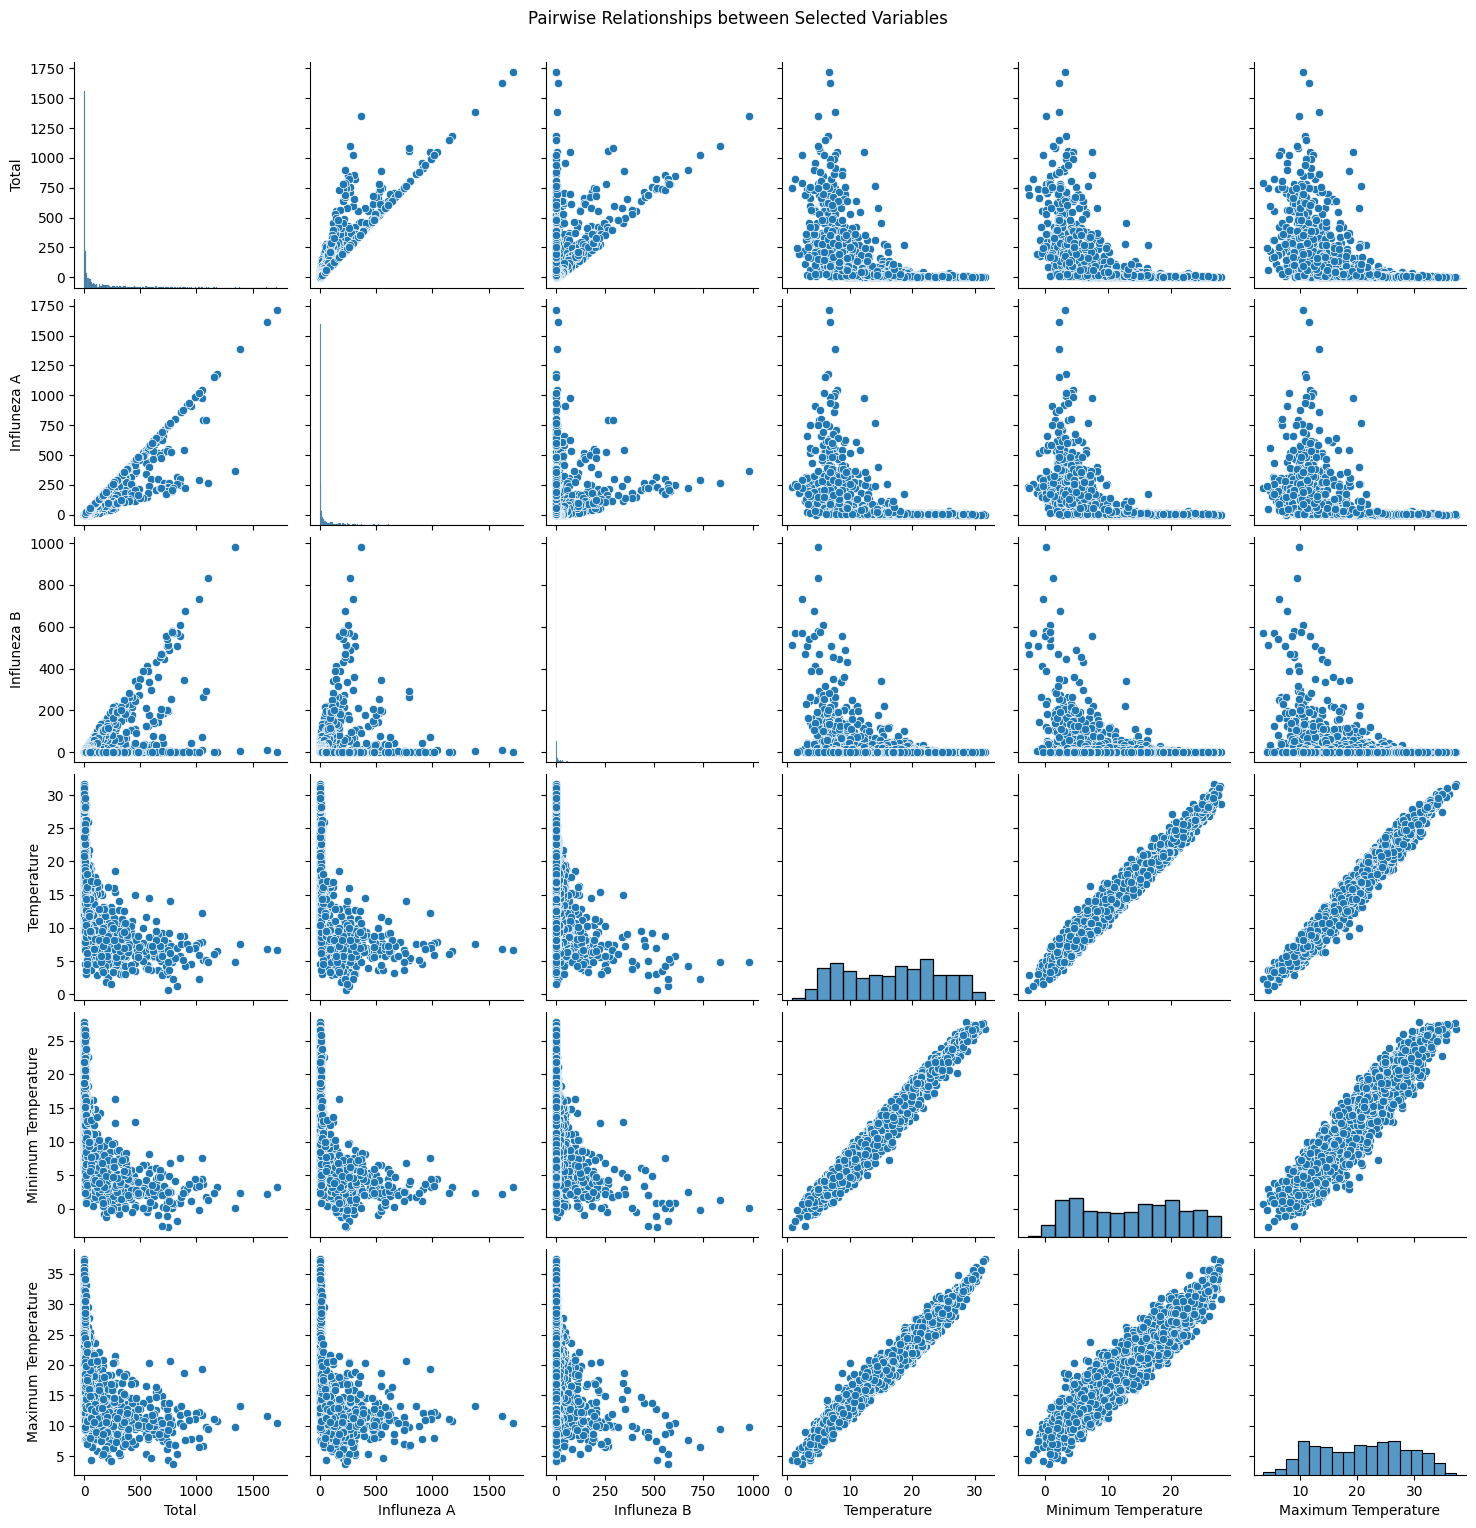

In [ ]:
selected_columns = ['Total', 'Influneza A', 'Influneza B', 'Temperature', 'Minimum Temperature', 'Maximum Temperature']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairwise Relationships between Selected Variables', y=1.02) # Adjust suptitle position
plt.show()

#df2

In [ ]:
df2 = pd.read_csv('dataEDA99.csv')
df2.head()

,Date,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,...,70–79 years,80 years and over,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2015-01-01,313,310,3,147,166,2,1,3,5,...,14,22,3.8,0.6,9.0,47,4.6,0.0,0.2,3.8
1,2015-01-02,311,307,4,156,155,2,1,7,5,...,17,17,3.2,-0.8,7.7,46,2.2,3.3,6.0,3.5
2,2015-01-03,298,294,4,134,164,0,0,6,7,...,11,12,4.5,0.3,8.5,45,2.3,6.6,9.6,3.7
3,2015-01-04,302,299,3,144,158,1,2,3,6,...,8,15,5.0,1.0,9.5,56,1.7,9.9,6.7,4.9
4,2015-01-05,713,710,3,352,361,3,3,33,16,...,27,16,7.8,2.7,13.3,57,2.6,13.2,9.3,5.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1826 non-null   datetime64[ns]
 1   Total                1826 non-null   int64         
 2   Influneza A          1826 non-null   int64         
 3   Influneza B          1826 non-null   int64         
 4   Male                 1826 non-null   int64         
 5   Female               1826 non-null   int64         
 6   0–5 months           1826 non-null   int64         
 7   6–11 months          1826 non-null   int64         
 8   1 year               1826 non-null   int64         
 9   2 years              1826 non-null   int64         
 10  3 years              1826 non-null   int64         
 11  4 years              1826 non-null   int64         
 12  5 years              1826 non-null   int64         
 13  6 years              1826 non-nul

In [ ]:
df2.isnull().sum()

,0
Date,0
Total,0
Influneza A,0
Influneza B,0
Male,0
Female,0
0–5 months,0
6–11 months,0
1 year,0
2 years,0


In [ ]:
df2.describe()

,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,3 years,...,70–79 years,80 years and over,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,...,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1824.000000,1826.000000
mean,89.648412,65.614458,24.033954,46.119934,43.528478,0.173056,0.568456,2.077218,2.274918,2.618291,...,2.954545,2.606791,16.800274,13.642826,20.751205,68.463308,3.489321,7.794085,5.700713,15.078861
std,192.997424,159.349225,77.438548,100.150245,93.145987,0.538549,1.393516,4.786288,5.289224,6.111429,...,7.304389,6.174170,7.578086,7.860737,7.728856,15.804873,1.199745,15.504301,4.228645,8.564782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.700000,-2.700000,3.600000,28.000000,1.300000,0.000000,0.000000,2.200000
25%,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.600000,6.200000,13.900000,57.000000,2.600000,0.000000,1.100000,7.225000
50%,8.000000,5.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,17.400000,14.300000,21.100000,71.000000,3.200000,1.500000,6.200000,13.600000
75%,62.000000,37.750000,9.000000,31.750000,32.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,22.800000,20.300000,26.800000,80.000000,4.000000,9.500000,9.400000,22.200000
max,1718.000000,1717.000000,981.000000,931.000000,787.000000,4.000000,12.000000,43.000000,55.000000,66.000000,...,71.000000,47.000000,31.600000,27.800000,37.400000,99.000000,9.000000,192.500000,13.800000,33.600000


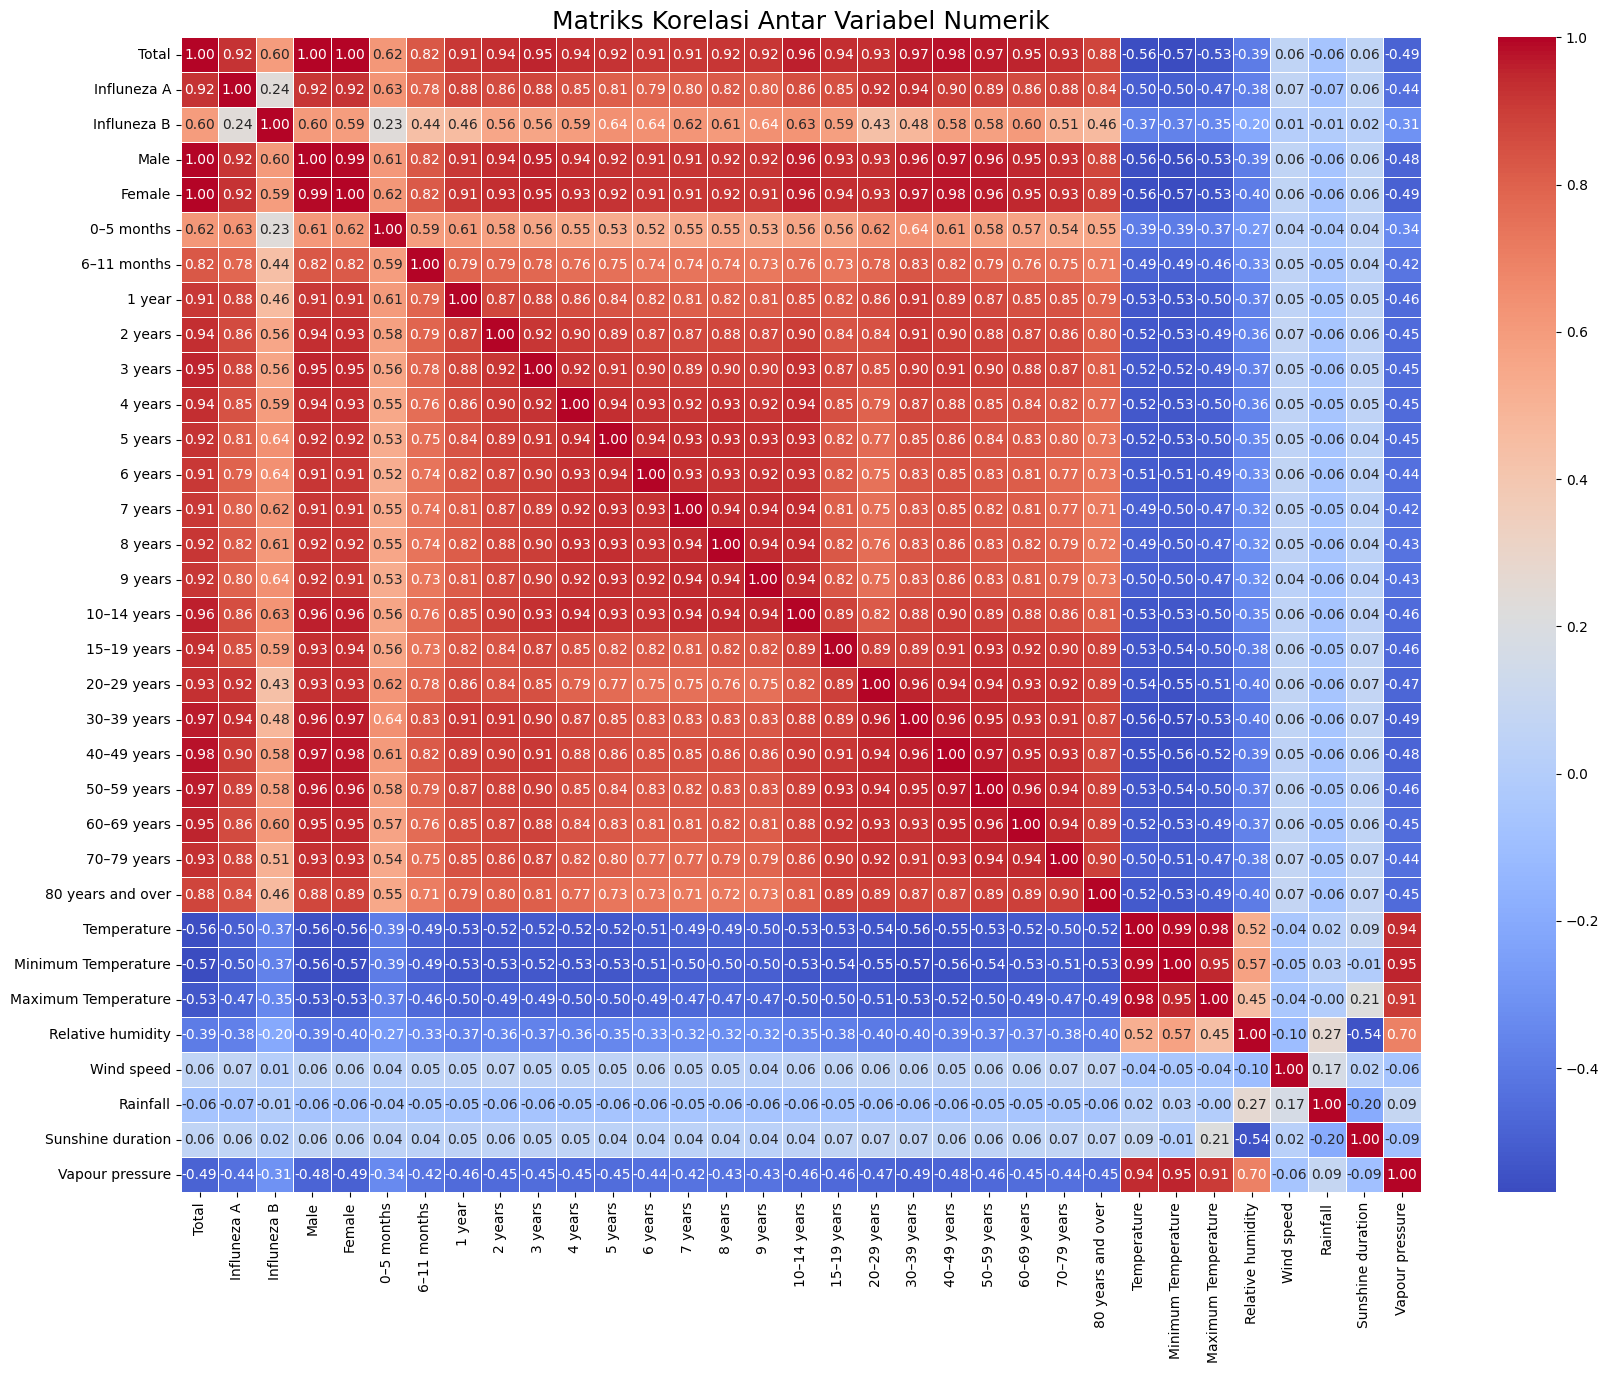

In [ ]:
numerical_df = df2.select_dtypes(include=np.number)

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Memvisualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi Antar Variabel Numerik', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#print("Berikut adalah matriks korelasi antar variabel numerik di DataFrame df. Nilai mendekati 1 menunjukkan korelasi positif kuat, -1 menunjukkan korelasi negatif kuat, dan 0 menunjukkan tidak ada korelasi linier.")

# prophet

In [2]:
df = pd.read_csv('dataEDA.csv')
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2015/1/1,313,310,3,147,166,3.8,0.6,9.0,47,4.6,0.0,0.2,3.8
1,2015/1/2,311,307,4,156,155,3.2,-0.8,7.7,46,2.2,NaN,6,3.5
2,2015/1/3,298,294,4,134,164,4.5,0.3,8.5,45,2.3,NaN,9.6,3.7
3,2015/1/4,302,299,3,144,158,5.0,1.0,9.5,56,1.7,NaN,6.7,4.9
4,2015/1/5,713,710,3,352,361,7.8,2.7,13.3,57,2.6,NaN,9.3,5.9


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Interpolasi 'Sunshine duration' jika ada NaN, karena regressor tidak boleh memiliki missing values
if 'Sunshine duration' in df.columns:
    df['Sunshine duration'] = pd.to_numeric(df['Sunshine duration'], errors='coerce')
    if df['Sunshine duration'].isnull().any():
        df['Sunshine duration'] = df['Sunshine duration'].interpolate(method='linear')

# Kolom yang akan dijadikan regressor (kecuali Date, Total, Influneza A, Influneza B, Rainfall)
regressor_columns = [
    'Temperature',
    'Relative humidity', 'Wind speed',
    'Sunshine duration', 'Vapour pressure'
]

# Persiapan DataFrame untuk Prophet
df_prophet = df[['Date', 'Total'] + regressor_columns].rename(columns={'Date': 'ds', 'Total': 'y'})

# Inisialisasi model Prophet
model = Prophet()

# Menambahkan regressor
for col in regressor_columns:
    model.add_regressor(col)

# Fit model
model.fit(df_prophet)

print("Prophet model has been initialized and fitted with additional regressors.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet model has been initialized and fitted with additional regressors.


In [21]:
# Membuat dataframe untuk tanggal di masa depan (misalnya, 365 hari ke depan)
future = model.make_future_dataframe(periods=365)

# Gabungkan regressor dari df_prophet ke dataframe future
# Pastikan df_prophet memiliki kolom 'ds' dan semua regressor
future = pd.merge(future, df_prophet[['ds'] + regressor_columns], on='ds', how='left')

# Untuk tanggal di masa depan yang tidak ada data regresornya,
# kita perlu mengisi nilai-nilai ini. Salah satu strategi adalah
# mengisi dengan rata-rata dari masing-masing regresor dari data historis.
for col in regressor_columns:
    if future[col].isnull().any():
        mean_val = df_prophet[col].mean() # Atau median, atau last known value
        future[col].fillna(mean_val, inplace=True)

# Melakukan prediksi
forecast = model.predict(future)

# Menampilkan 5 baris pertama dari prediksi
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,105.507343,-33.960974,233.724388
1,2015-01-02,131.976672,1.666825,264.833543
2,2015-01-03,132.628668,2.447864,274.093303
3,2015-01-04,119.087652,-20.668716,254.311705
4,2015-01-05,211.737981,75.690154,341.510173


In [23]:
mean_forecast = forecast['yhat'].mean()
print(f"Mean of the forecast: {mean_forecast:.2f}")

Mean of the forecast: 98.80


In [25]:
mean_forecast = forecast['yhat_upper'].mean()
print(f"Mean of the forecast: {mean_forecast:.2f}")

Mean of the forecast: 230.94


In [24]:
mean_forecast = forecast['yhat_lower'].mean()
print(f"Mean of the forecast: {mean_forecast:.2f}")

Mean of the forecast: -33.27


In [19]:
forecast.describe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Relative humidity,Relative humidity_lower,Relative humidity_upper,Sunshine duration,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2191,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2.191000e+03,2.191000e+03,2.191000e+03,2.191000e+03,...,2.191000e+03,2.191000e+03,2.191000e+03,2191.000000,2191.000000,2191.000000,2191.0,2191.0,2191.0,2191.000000
mean,2017-12-31 00:00:00.000000256,98.833604,-33.329750,231.147488,97.264597,100.466354,-9.339859e-16,-9.339859e-16,-9.339859e-16,4.621284e-17,...,-2.220868e-13,-2.220868e-13,-2.220868e-13,-0.032112,-0.032112,-0.032112,0.0,0.0,0.0,98.801492
min,2015-01-01 00:00:00,-43.772431,-223.334078,43.089424,-43.772431,-43.772431,-5.815122e+00,-5.815122e+00,-5.815122e+00,-5.771661e-01,...,-3.981907e+01,-3.981907e+01,-3.981907e+01,-102.229894,-102.229894,-102.229894,0.0,0.0,0.0,-84.434959
25%,2016-07-01 12:00:00,87.419392,-128.459919,134.880987,87.419392,87.419392,-1.816079e+00,-1.816079e+00,-1.816079e+00,-2.209389e-01,...,-9.562733e+00,-9.562733e+00,-9.562733e+00,-93.074336,-93.074336,-93.074336,0.0,0.0,0.0,3.034549
50%,2017-12-31 00:00:00,100.218814,-93.279743,171.646605,100.218814,100.218814,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-2.788914e+00,-2.788914e+00,-2.788914e+00,-82.911376,-82.911376,-82.911376,0.0,0.0,0.0,39.290365
75%,2019-07-01 12:00:00,116.657617,-17.087932,248.309976,116.657617,116.657617,1.611673e+00,1.611673e+00,1.611673e+00,2.492810e-01,...,1.435169e+01,1.435169e+01,1.435169e+01,16.942287,16.942287,16.942287,0.0,0.0,0.0,114.821320
max,2020-12-30 00:00:00,158.726299,580.111452,843.780694,136.814319,183.807625,7.705454e+00,7.705454e+00,7.705454e+00,4.060210e-01,...,3.600686e+01,3.600686e+01,3.600686e+01,550.713730,550.713730,550.713730,0.0,0.0,0.0,717.685961
std,NaN,34.767103,163.817924,163.847519,32.655070,37.452043,2.747497e+00,2.747497e+00,2.747497e+00,2.748951e-01,...,2.149225e+01,2.149225e+01,2.149225e+01,165.486281,165.486281,165.486281,0.0,0.0,0.0,163.743277


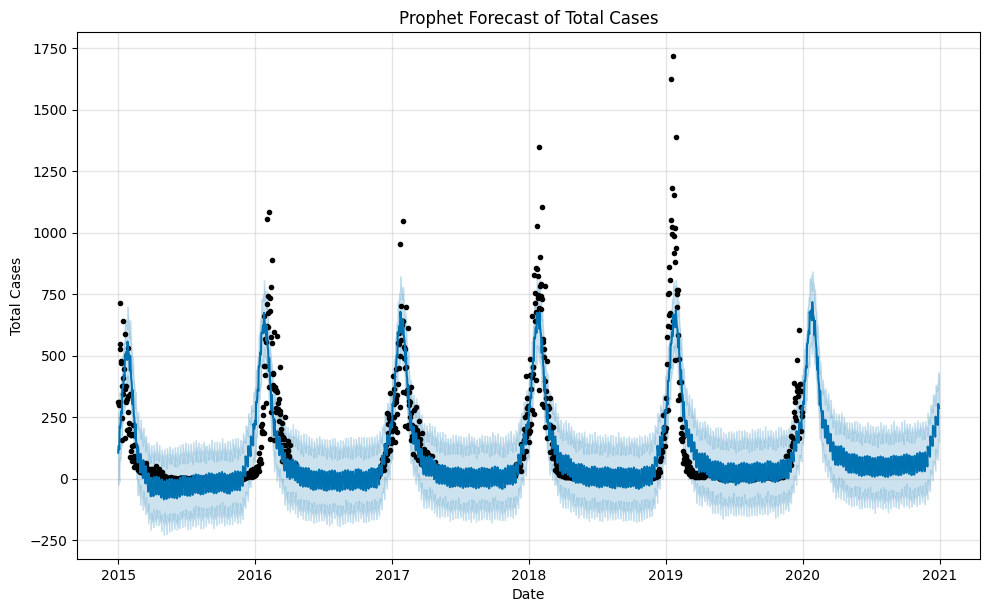

In [5]:
# Plotting the forecast
fig1 = model.plot(forecast)
plt.title('Prophet Forecast of Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

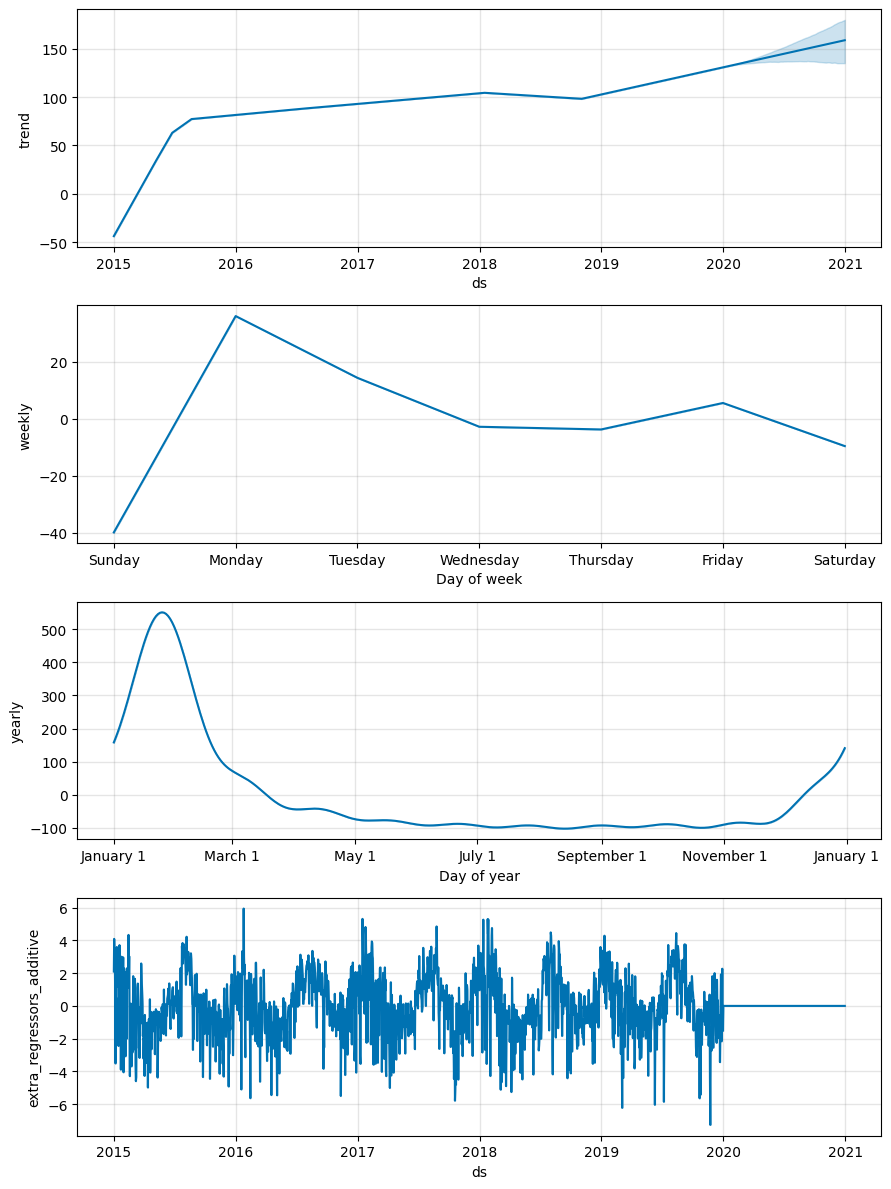

In [6]:
# Plotting the forecast components
fig2 = model.plot_components(forecast)
plt.show()

In [7]:
print(f"Tanggal mulai prediksi: {forecast['ds'].min()}")
print(f"Tanggal akhir prediksi: {forecast['ds'].max()}")

Tanggal mulai prediksi: 2015-01-01 00:00:00
Tanggal akhir prediksi: 2020-12-30 00:00:00


In [17]:
forecast_with_actual = pd.merge(forecast, df_prophet[['ds', 'y']], on='ds', how='left')
forecast_with_actual['residual'] = forecast_with_actual['y'] - forecast_with_actual['yhat']

# Display a sample of the residuals for the historical data
print("Residuals for the historical period:")
display(forecast_with_actual[['ds', 'y', 'yhat', 'residual']].dropna().head())

Residuals for the historical period:


,ds,y,yhat,residual
0,2015-01-01,313.0,105.507343,207.492657
1,2015-01-02,311.0,131.976672,179.023328
2,2015-01-03,298.0,132.628668,165.371332
3,2015-01-04,302.0,119.087652,182.912348
4,2015-01-05,713.0,211.737981,501.262019


In [15]:
display(df_perf)

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,70361.875778,265.258130,160.472049,0.550908,1.005574,0.602198
1,38 days,70657.863760,265.815469,161.724281,0.553860,1.010239,0.593407
2,39 days,71580.786886,267.545859,164.318876,0.553860,1.016011,0.585714
3,40 days,71017.992528,266.492012,163.545959,0.558967,1.009603,0.583516
4,41 days,70423.510518,265.374284,161.582026,0.558967,1.005951,0.589011
...,...,...,...,...,...,...,...
324,361 days,13357.194141,115.573328,69.429414,1.362676,1.235255,0.802198
325,362 days,13510.266170,116.233671,70.287911,1.333107,1.228614,0.796703
326,363 days,13560.086286,116.447784,70.751656,1.214009,1.213604,0.796703
327,364 days,14778.999634,121.568909,74.049122,1.119190,1.203212,0.789011


In [16]:
df_perf.describe()

,horizon,mse,rmse,mae,mdape,smape,coverage
count,329,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,201 days 00:00:00,14530.746601,96.081099,62.841459,5.072765,1.302698,0.881365
std,95 days 02:50:25.209861311,20940.676583,72.906276,38.319028,3.739081,0.173808,0.119764
min,37 days 00:00:00,1051.998476,32.434526,26.602135,0.550908,0.969868,0.583516
25%,119 days 00:00:00,1746.114288,41.786532,34.443952,2.207847,1.194559,0.796703
50%,201 days 00:00:00,4061.015309,63.726096,48.064717,4.316727,1.357875,0.920879
75%,283 days 00:00:00,13510.266170,116.233671,72.748879,5.814815,1.440040,0.994505
max,365 days 00:00:00,71580.786886,267.545859,164.318876,14.734289,1.522325,1.000000
